# MODULE 2: FINAL PROJECT - DATA MINING (COVID CASE INFORMATION)

- Melissa Mendoza
- Ethan Moncayo
- Randall Joseph Pajaro

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
import matplotlib.pyplot as plt

**CSV Import**

In [2]:
data = pd.read_csv(r'DOH COVID Data Drop_ 20201031 - 04 Case Information.csv')
data

,CaseCode,Age,AgeGroup,Sex,DateSpecimen,DateResultRelease,DateRepConf,DateDied,DateRecover,RemovalType,...,ProvRes,CityMunRes,CityMuniPSGC,BarangayRes,BarangayPSGC,HealthStatus,Quarantined,DateOnset,Pregnanttab,ValidationStatus
0,C642447,25.0,25 to 29,MALE,2020-07-14,2020-07-15,2020-07-19,NaN,NaN,RECOVERED,...,COTABATO CITY (NOT A PROVINCE),NaN,NaN,NaN,NaN,RECOVERED,NO,NaN,NaN,"Removal Type is ""Recovered"", but no Recovered ..."
1,C919481,54.0,50 to 54,MALE,2020-07-27,2020-07-30,2020-08-03,NaN,NaN,RECOVERED,...,NaN,NaN,NaN,NaN,NaN,RECOVERED,NO,NaN,NaN,"Health Status is ""Recovered"", but no Date Reco..."
2,C378726,50.0,50 to 54,FEMALE,2020-07-18,2020-07-19,2020-07-24,NaN,NaN,RECOVERED,...,NaN,NaN,NaN,NaN,NaN,RECOVERED,NO,NaN,NO,"Health Status is ""Recovered"", but no Date Reco..."
3,C556553,30.0,30 to 34,FEMALE,2020-05-27,2020-05-27,2020-05-31,NaN,NaN,RECOVERED,...,NaN,NaN,NaN,NaN,NaN,RECOVERED,NO,NaN,NO,"Removal Type is ""Recovered"", but no Recovered ..."
4,C210854,33.0,30 to 34,MALE,2020-07-21,2020-07-24,2020-07-28,NaN,NaN,RECOVERED,...,NaN,NaN,NaN,NaN,NaN,RECOVERED,NO,NaN,NaN,"Health Status is ""Recovered"", but no Date Reco..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380724,C881229,29.0,25 to 29,MALE,2020-09-09,2020-09-13,2020-09-16,NaN,2020-09-24,RECOVERED,...,ROMBLON,CALATRAVA,PH175904000,BALOGO,PH175904001,RECOVERED,YES,NaN,NaN,NaN
380725,C591169,22.0,20 to 24,MALE,2020-09-09,2020-09-13,2020-09-16,NaN,2020-09-24,RECOVERED,...,ROMBLON,CALATRAVA,PH175904000,BALOGO,PH175904001,RECOVERED,YES,NaN,NaN,NaN
380726,C325398,27.0,25 to 29,FEMALE,2020-09-09,2020-09-13,2020-09-16,NaN,2020-09-24,RECOVERED,...,ROMBLON,CALATRAVA,PH175904000,BALOGO,PH175904001,RECOVERED,YES,NaN,NO,Age or Birthdate is Invalid
380727,C768847,46.0,45 to 49,FEMALE,2020-08-24,2020-08-28,2020-08-30,NaN,2020-09-07,RECOVERED,...,ROMBLON,SANTA MARIA (IMELDA),PH175917000,NaN,NaN,RECOVERED,YES,2020-08-20,NO,NaN


In [3]:
data.info() #information about the dataset (this dataset is not for linear regression, but more on classification)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380729 entries, 0 to 380728
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CaseCode           380729 non-null  object 
 1   Age                378546 non-null  float64
 2   AgeGroup           378546 non-null  object 
 3   Sex                380729 non-null  object 
 4   DateSpecimen       318641 non-null  object 
 5   DateResultRelease  319409 non-null  object 
 6   DateRepConf        380729 non-null  object 
 7   DateDied           7155 non-null    object 
 8   DateRecover        91993 non-null   object 
 9   RemovalType        338267 non-null  object 
 10  Admitted           380579 non-null  object 
 11  RegionRes          377056 non-null  object 
 12  ProvRes            355798 non-null  object 
 13  CityMunRes         345275 non-null  object 
 14  CityMuniPSGC       345275 non-null  object 
 15  BarangayRes        151373 non-null  object 
 16  Ba

# Data Preprocessing and Cleaning

In [4]:
df = data.drop('CaseCode', axis=1)
df = df.drop(df.loc[:,'AgeGroup':'Sex'].columns, axis=1)
df = df.drop(df.loc[:, 'DateResultRelease':'Admitted'].columns, axis=1)
df = df.drop('ProvRes', axis=1)
df = df.drop(df.loc[:, 'CityMuniPSGC':'BarangayPSGC'].columns, axis=1)
df = df.drop(df.loc[:, 'DateOnset':'ValidationStatus'].columns, axis=1)
df

#mk

,Age,DateSpecimen,RegionRes,CityMunRes,HealthStatus,Quarantined
0,25.0,2020-07-14,Region XII: SOCCSKSARGEN,NaN,RECOVERED,NO
1,54.0,2020-07-27,NaN,NaN,RECOVERED,NO
2,50.0,2020-07-18,ROF,NaN,RECOVERED,NO
3,30.0,2020-05-27,NCR,NaN,RECOVERED,NO
4,33.0,2020-07-21,NCR,NaN,RECOVERED,NO
...,...,...,...,...,...,...
380724,29.0,2020-09-09,Region IV-B: MIMAROPA,CALATRAVA,RECOVERED,YES
380725,22.0,2020-09-09,Region IV-B: MIMAROPA,CALATRAVA,RECOVERED,YES
380726,27.0,2020-09-09,Region IV-B: MIMAROPA,CALATRAVA,RECOVERED,YES
380727,46.0,2020-08-24,Region IV-B: MIMAROPA,SANTA MARIA (IMELDA),RECOVERED,YES


In [5]:
titles = list(df.columns)
titles

['Age',
 'DateSpecimen',
 'RegionRes',
 'CityMunRes',
 'HealthStatus',
 'Quarantined']

In [6]:
titles[4], titles[5] = titles[5], titles[4]
titles[2], titles[3] = titles[3], titles[2]
titles

['Age',
 'DateSpecimen',
 'CityMunRes',
 'RegionRes',
 'Quarantined',
 'HealthStatus']

In [7]:
df = df[titles]
df

,Age,DateSpecimen,CityMunRes,RegionRes,Quarantined,HealthStatus
0,25.0,2020-07-14,NaN,Region XII: SOCCSKSARGEN,NO,RECOVERED
1,54.0,2020-07-27,NaN,NaN,NO,RECOVERED
2,50.0,2020-07-18,NaN,ROF,NO,RECOVERED
3,30.0,2020-05-27,NaN,NCR,NO,RECOVERED
4,33.0,2020-07-21,NaN,NCR,NO,RECOVERED
...,...,...,...,...,...,...
380724,29.0,2020-09-09,CALATRAVA,Region IV-B: MIMAROPA,YES,RECOVERED
380725,22.0,2020-09-09,CALATRAVA,Region IV-B: MIMAROPA,YES,RECOVERED
380726,27.0,2020-09-09,CALATRAVA,Region IV-B: MIMAROPA,YES,RECOVERED
380727,46.0,2020-08-24,SANTA MARIA (IMELDA),Region IV-B: MIMAROPA,YES,RECOVERED


**Limiting to 1 month date and 2 cities within NCR (Makati and Marikina City)**

In [8]:
start_date = '2020-09-30'
end_date = '2020-10-31'

df = df.loc[df['RegionRes'] == 'NCR']
df = df.loc[(df['DateSpecimen'] >= start_date) & ((df['DateSpecimen'] <= end_date))]
df

,Age,DateSpecimen,CityMunRes,RegionRes,Quarantined,HealthStatus
856,39.0,2020-10-02,CITY OF NAVOTAS,NCR,YES,RECOVERED
1250,33.0,2020-10-18,CITY OF MANILA,NCR,NO,MILD
1332,29.0,2020-10-25,CITY OF MANILA,NCR,NO,MILD
2294,29.0,2020-10-20,CITY OF MAKATI,NCR,NO,MILD
2535,22.0,2020-10-01,CITY OF PASIG,NCR,NO,RECOVERED
...,...,...,...,...,...,...
375822,21.0,2020-10-10,TAGUIG CITY,NCR,NO,MILD
375832,41.0,2020-10-08,TAGUIG CITY,NCR,NO,MILD
375836,6.0,2020-10-01,TAGUIG CITY,NCR,NO,RECOVERED
375838,40.0,2020-10-13,TAGUIG CITY,NCR,NO,MILD


In [9]:
#Cities in NCR
cities = df['CityMunRes'].unique().tolist()
cities

['CITY OF NAVOTAS',
 'CITY OF MANILA',
 'CITY OF MAKATI',
 'CITY OF PASIG',
 'CALOOCAN CITY',
 'CITY OF MALABON',
 'PASAY CITY',
 'QUEZON CITY',
 'CITY OF MANDALUYONG',
 'CITY OF MUNTINLUPA',
 'TAGUIG CITY',
 'CITY OF SAN JUAN',
 'CITY OF PARAÑAQUE',
 nan,
 'CITY OF MARIKINA',
 'CITY OF VALENZUELA',
 'CITY OF LAS PIÑAS',
 'PATEROS']

In [10]:
hpStats = df['HealthStatus'].unique().tolist()
hpStats

['RECOVERED', 'MILD', 'ASYMPTOMATIC', 'DIED', 'SEVERE', 'CRITICAL']

In [11]:
df = df.reset_index(drop=True)

['RECOVERED', 'MILD', 'ASYMPTOMATIC', 'DIED', 'SEVERE', 'CRITICAL']

In [12]:
df = df.dropna()
df = df.reset_index(drop=True)
df

,Age,DateSpecimen,CityMunRes,RegionRes,Quarantined,HealthStatus
0,39.0,2020-10-02,CITY OF NAVOTAS,NCR,YES,RECOVERED
1,33.0,2020-10-18,CITY OF MANILA,NCR,NO,MILD
2,29.0,2020-10-25,CITY OF MANILA,NCR,NO,MILD
3,29.0,2020-10-20,CITY OF MAKATI,NCR,NO,MILD
4,22.0,2020-10-01,CITY OF PASIG,NCR,NO,RECOVERED
...,...,...,...,...,...,...
14062,21.0,2020-10-10,TAGUIG CITY,NCR,NO,MILD
14063,41.0,2020-10-08,TAGUIG CITY,NCR,NO,MILD
14064,6.0,2020-10-01,TAGUIG CITY,NCR,NO,RECOVERED
14065,40.0,2020-10-13,TAGUIG CITY,NCR,NO,MILD


In [13]:
df['DateSpecimen'] = pd.to_datetime(df['DateSpecimen'], format='%Y-%m-%d')
df

,Age,DateSpecimen,CityMunRes,RegionRes,Quarantined,HealthStatus
0,39.0,2020-10-02,CITY OF NAVOTAS,NCR,YES,RECOVERED
1,33.0,2020-10-18,CITY OF MANILA,NCR,NO,MILD
2,29.0,2020-10-25,CITY OF MANILA,NCR,NO,MILD
3,29.0,2020-10-20,CITY OF MAKATI,NCR,NO,MILD
4,22.0,2020-10-01,CITY OF PASIG,NCR,NO,RECOVERED
...,...,...,...,...,...,...
14062,21.0,2020-10-10,TAGUIG CITY,NCR,NO,MILD
14063,41.0,2020-10-08,TAGUIG CITY,NCR,NO,MILD
14064,6.0,2020-10-01,TAGUIG CITY,NCR,NO,RECOVERED
14065,40.0,2020-10-13,TAGUIG CITY,NCR,NO,MILD


In [14]:
df['DateSpecimen'] = df['DateSpecimen'].dt.strftime('%m/%d/%Y')
df

,Age,DateSpecimen,CityMunRes,RegionRes,Quarantined,HealthStatus
0,39.0,10/02/2020,CITY OF NAVOTAS,NCR,YES,RECOVERED
1,33.0,10/18/2020,CITY OF MANILA,NCR,NO,MILD
2,29.0,10/25/2020,CITY OF MANILA,NCR,NO,MILD
3,29.0,10/20/2020,CITY OF MAKATI,NCR,NO,MILD
4,22.0,10/01/2020,CITY OF PASIG,NCR,NO,RECOVERED
...,...,...,...,...,...,...
14062,21.0,10/10/2020,TAGUIG CITY,NCR,NO,MILD
14063,41.0,10/08/2020,TAGUIG CITY,NCR,NO,MILD
14064,6.0,10/01/2020,TAGUIG CITY,NCR,NO,RECOVERED
14065,40.0,10/13/2020,TAGUIG CITY,NCR,NO,MILD


In [15]:
combinedcity = df.loc[(df['CityMunRes'] == 'CITY OF MARIKINA') | (df['CityMunRes'] == 'CITY OF PASIG')]
c1 = df.loc[df['CityMunRes'] == 'CITY OF MARIKINA']
c2 = df.loc[df['CityMunRes'] == 'CITY OF MAKATI']

c1 = c1.reset_index(drop=True)
c2 = c2.reset_index(drop=True)#mk

In [16]:
c1

,Age,DateSpecimen,CityMunRes,RegionRes,Quarantined,HealthStatus
0,67.0,10/02/2020,CITY OF MARIKINA,NCR,NO,SEVERE
1,32.0,10/27/2020,CITY OF MARIKINA,NCR,NO,MILD
2,40.0,10/05/2020,CITY OF MARIKINA,NCR,NO,RECOVERED
3,23.0,10/10/2020,CITY OF MARIKINA,NCR,NO,RECOVERED
4,31.0,10/10/2020,CITY OF MARIKINA,NCR,NO,MILD
...,...,...,...,...,...,...
422,74.0,10/10/2020,CITY OF MARIKINA,NCR,NO,MILD
423,41.0,10/07/2020,CITY OF MARIKINA,NCR,NO,RECOVERED
424,26.0,10/08/2020,CITY OF MARIKINA,NCR,NO,MILD
425,41.0,10/01/2020,CITY OF MARIKINA,NCR,YES,RECOVERED


In [17]:
c2

,Age,DateSpecimen,CityMunRes,RegionRes,Quarantined,HealthStatus
0,29.0,10/20/2020,CITY OF MAKATI,NCR,NO,MILD
1,47.0,10/16/2020,CITY OF MAKATI,NCR,NO,MILD
2,27.0,10/23/2020,CITY OF MAKATI,NCR,NO,MILD
3,87.0,10/19/2020,CITY OF MAKATI,NCR,NO,ASYMPTOMATIC
4,38.0,10/03/2020,CITY OF MAKATI,NCR,NO,RECOVERED
...,...,...,...,...,...,...
1059,50.0,10/04/2020,CITY OF MAKATI,NCR,YES,RECOVERED
1060,70.0,10/17/2020,CITY OF MAKATI,NCR,YES,SEVERE
1061,39.0,10/08/2020,CITY OF MAKATI,NCR,NO,MILD
1062,31.0,10/12/2020,CITY OF MAKATI,NCR,NO,MILD


In [19]:
c1['HealthStatus'] = c1['HealthStatus'].map({'RECOVERED':1,'MILD':2,'ASYMPTOMATIC':3,'CRITICAL':4,'SEVERE':5,'DIED':6}) #Classifiers
c2['HealthStatus'] = c2['HealthStatus'].map({'RECOVERED':1,'MILD':2,'ASYMPTOMATIC':3,'CRITICAL':4,'SEVERE':5,'DIED':6})
c1['Quarantined'] = c1['Quarantined'].map({'YES':0, 'NO':1}) 
c2['Quarantined'] = c2['Quarantined'].map({'YES':0, 'NO':1})#mk

In [20]:
c2

,Age,DateSpecimen,CityMunRes,RegionRes,Quarantined,HealthStatus
0,29.0,10/20/2020,CITY OF MAKATI,NCR,1,2
1,47.0,10/16/2020,CITY OF MAKATI,NCR,1,2
2,27.0,10/23/2020,CITY OF MAKATI,NCR,1,2
3,87.0,10/19/2020,CITY OF MAKATI,NCR,1,3
4,38.0,10/03/2020,CITY OF MAKATI,NCR,1,1
...,...,...,...,...,...,...
1059,50.0,10/04/2020,CITY OF MAKATI,NCR,0,1
1060,70.0,10/17/2020,CITY OF MAKATI,NCR,0,5
1061,39.0,10/08/2020,CITY OF MAKATI,NCR,1,2
1062,31.0,10/12/2020,CITY OF MAKATI,NCR,1,2


In [21]:
c1[['HealthStatus','Quarantined']] = c1[['HealthStatus','Quarantined']].apply(pd.to_numeric)
c2[['HealthStatus','Quarantined']] = c2[['HealthStatus','Quarantined']].apply(pd.to_numeric)

# Prediction

In [38]:
c1.corr() # looking for correlation

,Age,Quarantined,HealthStatus
Age,1.000000,-0.016493,0.253019
Quarantined,-0.016493,1.000000,0.057034
HealthStatus,0.253019,0.057034,1.000000


In [23]:
c1x = c1[['Age','Quarantined']] #values that will determine y
c2x = c2[['Age','Quarantined']]
c1y = c1['HealthStatus'] #patient is recovered, sick, or dead
c2y = c2['HealthStatus'] #mk

In [24]:
clf = LogisticRegression()

In [25]:
c1x_train, c1x_test, c1y_train, c1y_test = train_test_split(c1x, c1y, test_size = 0.2) #Marikina #mk
c2x_train, c2x_test, c2y_train, c2y_test = train_test_split(c2x, c2y, test_size = 0.2) #Makati

In [26]:
clf1 = clf.fit(c1x_train,c1y_train) #modeling
clf2 = clf.fit(c2x_train,c2y_train)#mk

In [39]:
c1_pred = clf1.predict(c1x_test) #mk
c2_pred = clf2.predict(c2x_test)#predictions

array([2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 5, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
      dtype=int64)

In [28]:
mc1 = metrics.confusion_matrix(c1y_test, c1_pred)
mc2 = metrics.confusion_matrix(c2y_test, c2_pred)
mc2

array([[  2,  54,   0,   0,   0],
       [  0, 147,   0,   1,   0],
       [  1,   0,   0,   0,   0],
       [  3,   0,   0,   2,   0],
       [  2,   0,   0,   1,   0]], dtype=int64)

In [29]:
print(classification_report(c1y_test,c1_pred))
print(classification_report(c2y_test,c2_pred))

              precision    recall  f1-score   support

           1       1.00      0.05      0.10        19
           2       0.79      1.00      0.88        66
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         1

    accuracy                           0.78        86
   macro avg       0.45      0.26      0.24        86
weighted avg       0.82      0.78      0.70        86

              precision    recall  f1-score   support

           1       0.25      0.04      0.06        56
           2       0.73      0.99      0.84       148
           3       0.00      0.00      0.00         1
           5       0.50      0.40      0.44         5
           6       0.00      0.00      0.00         3

    accuracy                           0.71       213
   macro avg       0.30      0.29      0.27       213
weighted avg       0.59      0.71      0.61       213



In [30]:
import seaborn as sns

<Figure size 1080x72 with 0 Axes>

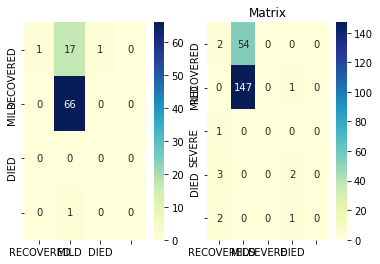

In [31]:
plt.figure(figsize=(15,1))
fig,ax = plt.subplots(1,2)
hc1 = sns.heatmap(pd.DataFrame(mc1), annot=True, cmap="YlGnBu",fmt='g',ax=ax[0])
hc2 = sns.heatmap(pd.DataFrame(mc2), annot=True, cmap="YlGnBu",fmt='g',ax=ax[1])
hc1.xaxis.set_label_position("top")
hc2.xaxis.set_label_position("top")

hc1Stats = ['RECOVERED','MILD','DIED']
hc2Stats = ['RECOVERED','MILD','SEVERE','DIED']

hc1.set_xticklabels(hc1Stats)
hc1.set_yticklabels(hc1Stats)
hc2.set_xticklabels(hc2Stats)
hc2.set_yticklabels(hc2Stats)
plt.title('Matrix')
fig.show()

# Per City Analytics

<Figure size 720x720 with 0 Axes>

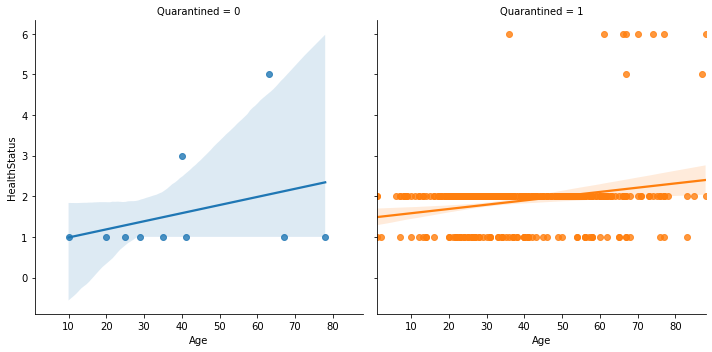

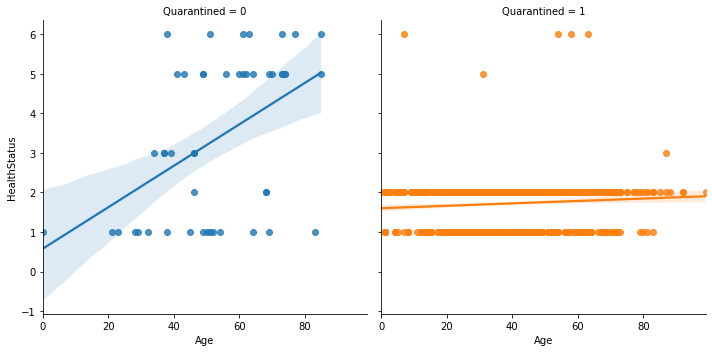

In [32]:
plt.figure(figsize=(10,10))
sns.lmplot(x='Age',y='HealthStatus', hue='Quarantined',col='Quarantined',data=c1) #marikina
sns.lmplot(x='Age',y='HealthStatus', hue='Quarantined',col='Quarantined',data=c2) #pasig
plt.show()#mk

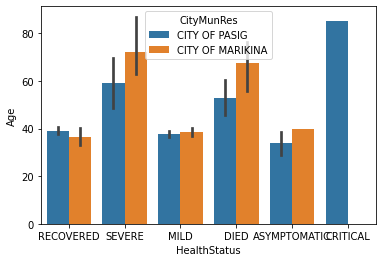

In [33]:
sns.barplot(x='HealthStatus',y='Age', hue='CityMunRes',data=combinedcity)

# Per City Prediction

In order to create a per city prediction, 2 functions were created that takes a user input of a person's age and quarantine status. Then it will take those inputs and creates a prediction based on the model that was created above. These functions will return a value of either recovered, sick, or dead and a plot showing where their inputs lie on the graph.

In [34]:
def predC1(x,y): #MARIKINA
    pred = clf1.predict([[x,y]])
    predictedVal = ''
    qr = y+3

    if pred[0] == 1:
        pc1 = c1
        pc1 = pc1.append({'HealthStatus':pred[0],'Age':x,'Quarantined':qr},ignore_index=True) #adding values of the user input to the dataframe
        sns.lmplot(x='Age',y='HealthStatus', hue='Quarantined',data=pc1) #linear model plot
        predictedVal = 'RECOVERED'
        return predictedVal
    elif pred[0] < 5 and pred[0] > 1:
        pc1 = c1
        pc1 = pc1.append({'HealthStatus':pred[0],'Age':x,'Quarantined':qr},ignore_index=True)
        sns.lmplot(x='Age',y='HealthStatus', hue='Quarantined',data=pc1) 
        predictedVal = 'SICK'
        return predictedVal
    elif pred[0] == 5:
        pc1 = c1
        pc1 = pc1.append({'HealthStatus':pred[0],'Age':x,'Quarantined':qr},ignore_index=True)
        sns.lmplot(x='Age',y='HealthStatus', hue='Quarantined',data=pc1) 
        predictedVal = 'DEAD'
        return predictedVal
    

def predC2(x,y): #MAKATI
    pred = clf2.predict([[x,y]]) #prediction based on the model
    predictedVal = ''
    qr = y+3 #for unique value

    if pred[0] == 1:
        pc2 = c2
        pc2 = pc2.append({'HealthStatus':pred[0],'Age':x,'Quarantined':qr},ignore_index=True) 
        sns.lmplot(x='Age',y='HealthStatus', hue='Quarantined',data=pc2) 
        predictedVal = 'RECOVERED'
        return predictedVal
    elif pred[0] < 5 and pred[0] > 1:
        pc2 = c2
        pc2 = pc2.append({'HealthStatus':pred[0],'Age':x,'Quarantined':qr},ignore_index=True)
        sns.lmplot(x='Age',y='HealthStatus', hue='Quarantined',data=pc2) 
        predictedVal = 'SICK'
        return predictedVal
    elif pred[0] == 5:
        pc2 = c2
        pc2 = pc2.append({'HealthStatus':pred[0],'Age':x,'Quarantined':qr},ignore_index=True)
        sns.lmplot(x='Age',y='HealthStatus', hue='Quarantined',data=pc2)
        predictedVal = 'DEAD'
        return predictedVal

City 1 = ( CITY OF MARIKINA ) Prediction:  RECOVERED


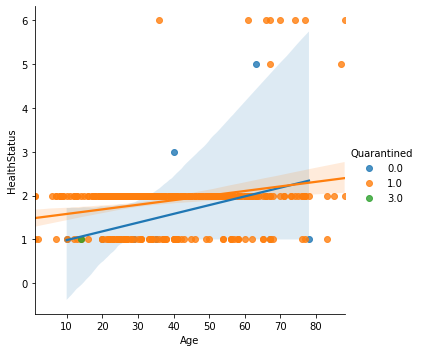

In [40]:
c1Age = input('Enter Age: ') #user input for age
c1QuarStat = input('Are you Quarantined?[y/n]: ') #user input for quarantine status
c1QuarStat = c1QuarStat.lower()
c1q=0

if c1QuarStat == 'y':
    c1q = 0
elif c1QuarStat == 'n':
    c1q = 1

print('City 1 = (', c1['CityMunRes'][0], ') Prediction: ', predC1(float(int(c1Age)), int(c1q)))

City 2 = ( CITY OF MAKATI ) Prediction:  RECOVERED


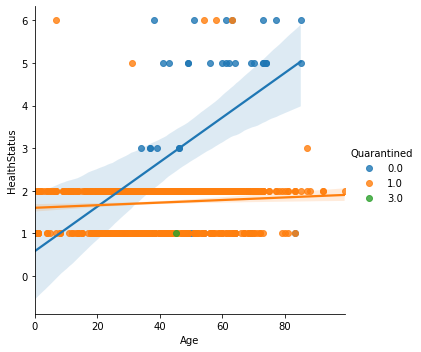

In [36]:
c2Age = input('Enter Age: ')
c2QuarStat = input('Are you Quarantined?[y/n]: ')
c2QuarStat = c2QuarStat.lower()
c2q=0

if c2QuarStat == 'y':
    c2q = 0
elif c2QuarStat == 'n':
    c2q = 1

print('City 2 = (', c2['CityMunRes'][0], ') Prediction: ', predC2(float(int(c2Age)), int(c2q)))

# Comparative Result Analytics

City 1 = ( CITY OF MARIKINA ) Prediction:  RECOVERED
City 2 = ( CITY OF MAKATI ) Prediction:  RECOVERED


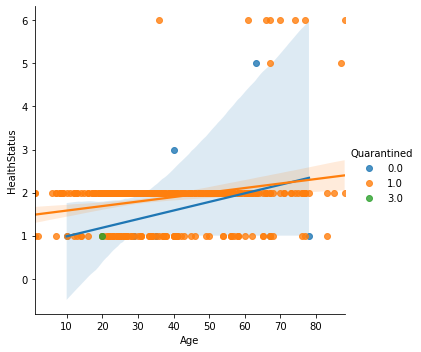

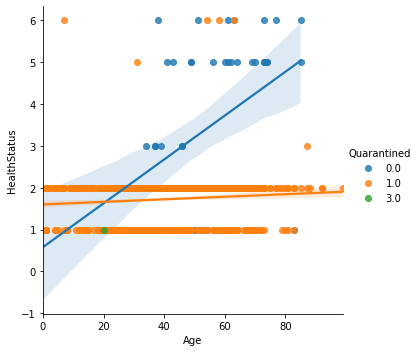

In [37]:
age = input('Enter Age: ')
quarStat = input('Are you Quarantined?[y/n]: ')
quarStat = quarStat.lower()
q=0

if quarStat == 'y':
    q = 0
elif quarStat == 'n':
    q = 1

print('City 1 = (', c1['CityMunRes'][0], ') Prediction: ', predC1(float(int(age)), int(q)))
print('City 2 = (', c2['CityMunRes'][0], ') Prediction: ', predC2(float(int(age)), int(q)))

#mk

# Narrative Analysis